In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
DATA_DIR = "../input/kaggle-survey-2022/"

In [3]:
os.listdir(DATA_DIR)

['Supplementary Data', 'kaggle_survey_2022_responses.csv']

In [4]:
data_df = pd.read_csv(DATA_DIR+'kaggle_survey_2022_responses.csv')
data_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.



,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


1. Countries representing most DL/Ml developers
10. Which countries have most DS and ML professionals and students
2. Most representative age group
3. how many students vs professionals
4. How students prefer to learn DS and ML
5. How professionals prefer to learn DS and ML
6. Programming language students prefer
7. programming language that professionals prefer
8. frameworks that students prefer vs professionals
9. What idustry is utilizing ML most, how they use ML , Q 24, 27, 28



# Top 10 Countries representing most DL/Ml developers

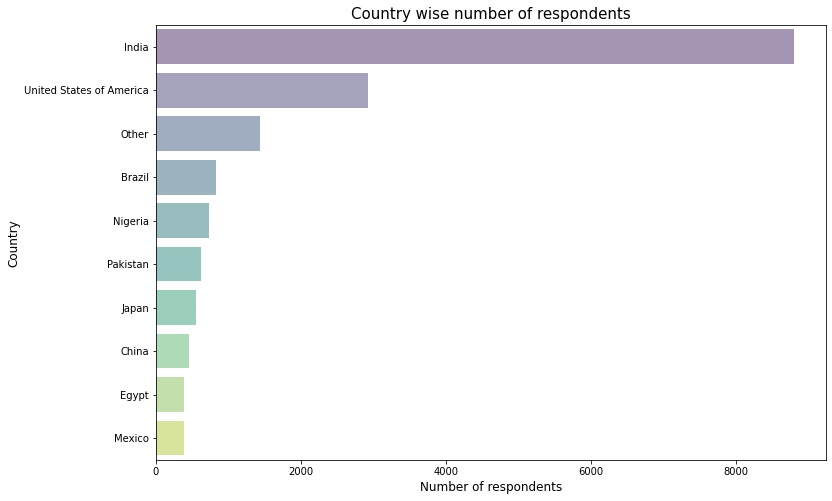

In [5]:
#ax = data_df.loc[1:, 'Q4'].value_counts().plot(kind="bar", figsize=(10, 5))
d = pd.DataFrame(data_df.loc[1:, 'Q4'].value_counts().nlargest(10))
plt.figure(figsize=(12,8))
sns.barplot(x=d['Q4'], y=d.index, palette='viridis', alpha=0.5)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

# Which country has most students vs professionals

In [6]:
students_countries = data_df.loc[(data_df['Q5'] == 'Yes'),'Q4'].value_counts()
students_countries

India                                                   4967
United States of America                                 924
Other                                                    708
Nigeria                                                  482
Brazil                                                   437
Pakistan                                                 418
China                                                    290
Egypt                                                    240
Indonesia                                                228
Mexico                                                   192
Bangladesh                                               182
Turkey                                                   175
Russia                                                   160
Colombia                                                 137
Viet Nam                                                 135
Kenya                                                    134
Morocco                 

In [7]:
pros_countries = data_df.loc[(data_df['Q5'] == 'No'),'Q4'].value_counts()
pros_countries

India                                                   3825
United States of America                                1996
Other                                                    722
Japan                                                    470
Brazil                                                   396
Nigeria                                                  249
South Korea                                              213
Pakistan                                                 202
France                                                   188
Mexico                                                   188
Spain                                                    177
Taiwan                                                   172
United Kingdom of Great Britain and Northern Ireland     171
Canada                                                   170
Turkey                                                   170
Russia                                                   164
China                   

In [8]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [9]:
loc_df = pd.read_csv("./location_map.csv")
new_df = pd.merge(data_df[["Q4","Q5"]], loc_df, left_on="Q4", right_on="COUNTRY")
new_df = new_df.groupby(["Q5", "CODE"])["Q4"].aggregate('count').reset_index()
new_df.columns = ["IsStudent", "CCode", "Count"]


In [10]:
import plotly.express as px
fig = px.scatter_geo(new_df, locations="CCode", color="IsStudent",color_discrete_map={
                "No": "Blue",
                "Yes": "Yellow"},
                     hover_name="Count", size="Count"
                     )
# fig.update_traces(marker=dict(opacity=0.5),
#                   selector=dict(mode='markers'))

fig.show()


# Most representative age group

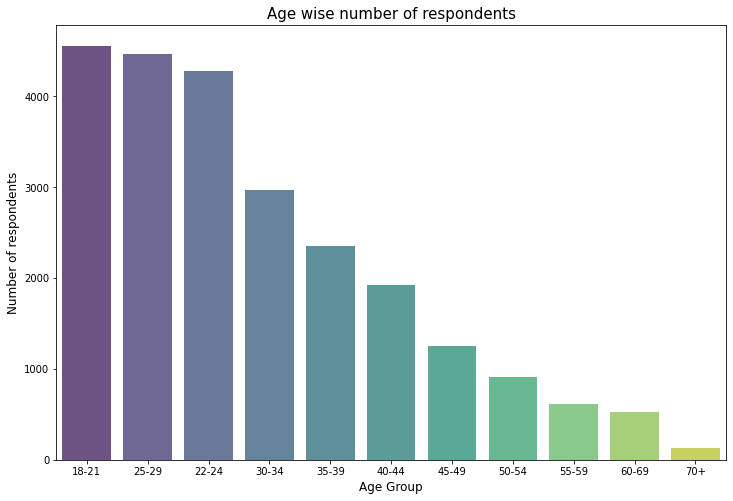

In [11]:
age_group = pd.DataFrame(data_df.loc[1:, 'Q2'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x=age_group.index, y=age_group['Q2'], palette='viridis', alpha=0.8)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of respondents', fontsize=12)
plt.title("Age wise number of respondents", fontsize=15)
plt.show()

# How many students vs professionals

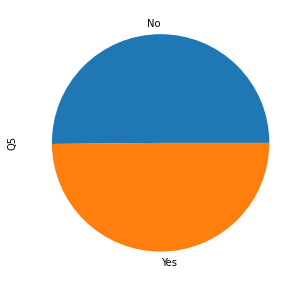

In [12]:
ax3 = data_df.loc[1:, 'Q5'].value_counts().plot(kind="pie", figsize=(10, 5))

# How students prefer to learn DS and ML

In [13]:
ml_prefer = data_df.loc[:,'Q5':'Q6_12'] 

ml_prefer.head()

,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
0,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...
1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN
3,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,Udemy,LinkedIn Learning,NaN,University Courses (resulting in a university ...,NaN,NaN
4,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other


In [14]:
students = ml_prefer.loc[(ml_prefer['Q5'] == 'Yes'),'Q6_1':].apply(pd.value_counts).fillna(0).astype(int)
students = students.sum(axis=1)

pros = ml_prefer.loc[(ml_prefer['Q5'] == 'No'),'Q6_1':].apply(pd.value_counts).fillna(0).astype(int)
pros = pros.sum(axis=1)

In [15]:
students

Cloud-certification programs (direct from AWS, Azure, GCP, or similar)     846
Coursera                                                                  4520
DataCamp                                                                  1761
Fast.ai                                                                    346
Kaggle Learn Courses                                                      3330
LinkedIn Learning                                                         1346
None                                                                      1310
Other                                                                     2623
Udacity                                                                    950
Udemy                                                                     2842
University Courses (resulting in a university degree)                     4234
edX                                                                       1029
dtype: int64

In [16]:
#ml_prefer = ml_prefer.iloc[1:,:].fillna(0)
# ml_prefer.iloc[1:,1:] = (ml_prefer.iloc[1:,1:].notnull()).astype('int')
# ml_prefer

<Figure size 864x576 with 0 Axes>

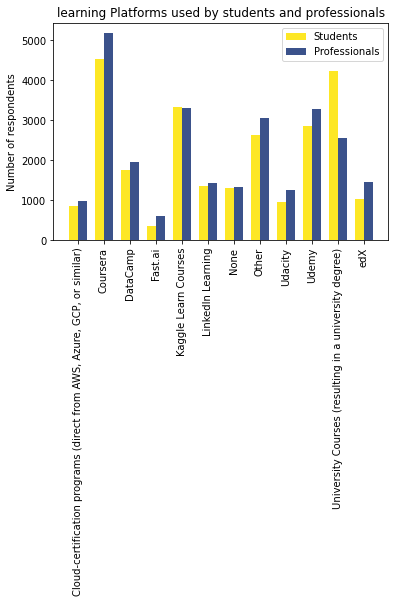

In [17]:
plt.figure(figsize=(12,8))
x = np.arange(len(students)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, students, width, label='Students', color='#fde725')
rects2 = ax.bar(x + width/2, pros, width, label='Professionals', color='#3b528b')


ax.set_ylabel('Number of respondents')
ax.set_title('learning Platforms used by students and professionals')
ax.set_xticks(x, students.index)
plt.xticks(rotation=90)
ax.legend()

plt.show()

In [18]:
progLang_prefer = data_df.loc[:,'Q12_1':'Q12_15']
progLang_prefer['Q5'] = data_df['Q5']

progLang_prefer.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q5
0,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,"Are you currently a student? (high school, uni..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN,Yes
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,No


In [19]:
students_plang = progLang_prefer.loc[(progLang_prefer['Q5'] == 'Yes'),'Q12_1':'Q12_15'].apply(pd.value_counts).fillna(0).astype(int)
students_plang = students_plang.sum(axis=1)

pros_plang = progLang_prefer.loc[(progLang_prefer['Q5'] == 'No'),'Q12_1':'Q12_15'].apply(pd.value_counts).fillna(0).astype(int)
pros_plang = pros_plang.sum(axis=1)

In [20]:
students_plang

Bash           535
C             2474
C#             673
C++           2967
Go             120
Java          2322
Javascript    1788
Julia          134
MATLAB        1412
None            86
Other          465
PHP            808
Python        9393
R             2197
SQL           4267
dtype: int64

In [21]:
pros_plang

Bash          1139
C             1327
C#             800
C++           1582
Go             202
Java          1540
Javascript    1701
Julia          162
MATLAB        1029
None           170
Other          877
PHP            635
Python        9260
R             2374
SQL           5353
dtype: int64

<Figure size 864x576 with 0 Axes>

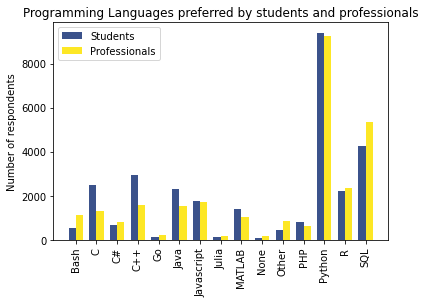

In [22]:
plt.figure(figsize=(12,8))
x = np.arange(len(students_plang)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, students_plang, width, label='Students', color='#3b528b')
rects2 = ax.bar(x + width/2, pros_plang, width, label='Professionals', color='#fde725')


ax.set_ylabel('Number of respondents')
ax.set_title('Programming Languages preferred by students and professionals')
ax.set_xticks(x, students_plang.index)
plt.xticks(rotation=90)
ax.legend()

plt.show()